In [79]:
import warnings
warnings.filterwarnings('ignore')

import glob
import os
import numpy as np
import pandas as pd
from pandas import read_csv, DataFrame
from sklearn.model_selection import train_test_split 

np.random.seed(123)

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from xgboost import XGBClassifier # XGboost

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

import pickle
import itertools

from imblearn.over_sampling import SMOTE

In [28]:
def plot_confusion_matrix(cm, classes,
                          set_path = 'Valid',
                          normalize=True,
                          patient_id = None,
                          cmap=plt.cm.Reds):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(8,8))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('P_' + patient_id)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Truth')
    plt.xlabel('Predicted')
    plt.savefig(fname = './' + set_path + '/Conf_mat/' + 'P_' + patient_id + ".png", dpi = 180)
    plt.close()

In [2]:
setpath = 'Exp'

paths = glob.glob("./" + setpath + '/*.csv',recursive=True)
    
print(f'{len(paths)} files detected in folder {setpath}, data compilation begins...')

paths

2 files detected in folder Exp, data compilation begins...


['./Exp\\P_108.csv', './Exp\\P_88.csv']

In [3]:
path = paths[0]

temp_df = read_csv(path, sep = ",", )
print('File {} contains {} instances'.format(path.split('\\')[1], temp_df.shape[0]))
print('Encoded labels :')

temp_df.head()

File P_108.csv contains 79 instances
Encoded labels :


,t,anorm_raw_mean,ax_raw_mean,ay_raw_mean,az_raw_mean,gnorm_raw_mean,gx_raw_mean,gy_raw_mean,gz_raw_mean,anorm_dc_mean,...,Effort,Normal,Central,Awake_rem,age,gender,weight,height,bmi,collar
0,2017-07-26 23:00:00+02:00,0.968176,0.911390,0.206922,0.152029,2.516491,-0.042502,-0.468573,-0.483499,-0.000001,...,0,0,0,5,51.52,1,61.0,162.0,23.24,33.0
1,2017-07-26 23:05:00+02:00,1.016984,-0.556552,0.527069,0.224714,6.132589,0.329656,-0.140428,-0.174371,0.000004,...,0,0,0,5,51.52,1,61.0,162.0,23.24,33.0
2,2017-07-26 23:10:00+02:00,1.024768,-0.891842,0.431706,0.259075,0.946743,0.177683,-0.221517,-0.002356,-0.000002,...,0,0,0,5,51.52,1,61.0,162.0,23.24,33.0
3,2017-07-26 23:15:00+02:00,1.023993,-0.878977,0.444069,0.280255,0.661237,0.174143,-0.226309,-0.012311,0.000002,...,0,0,0,-1,51.52,1,61.0,162.0,23.24,33.0
4,2017-07-26 23:20:00+02:00,1.023542,-0.869566,0.456774,0.287972,0.486996,0.179497,-0.225177,-0.017367,-0.000002,...,0,0,0,-1,51.52,1,61.0,162.0,23.24,33.0


In [10]:
temp_df[['t','timestamp']].head()

,t,timestamp
0,2017-07-26 23:00:00+02:00,1.501096e+09
1,2017-07-26 23:05:00+02:00,1.501096e+09
2,2017-07-26 23:10:00+02:00,1.501096e+09
3,2017-07-26 23:15:00+02:00,1.501096e+09
4,2017-07-26 23:20:00+02:00,1.501097e+09


In [12]:
for col in temp_df.columns: print(col)

t
anorm_raw_mean
ax_raw_mean
ay_raw_mean
az_raw_mean
gnorm_raw_mean
gx_raw_mean
gy_raw_mean
gz_raw_mean
anorm_dc_mean
anorm_ema_arousal_mean
anorm_ema_arousal2_mean
anorm_low_mean
anorm_respi_mean
anorm_respi_ema_mean
anorm_low_ema_arousal_mean
anorm_low_ema_wake_mean
anorm_low_ema_wake2_mean
anorm_low_ema_wake3_mean
anorm_low_ema_wake4_mean
anorm_respi_energy_mean
anorm_respi_energy2_mean
anorm_respi_energy_low_std_mean
anorm_respi_energy_low_mean_mean
anorm_entropy_mean
ay_dc_mean
ay_ema_arousal_mean
ay_ema_arousal2_mean
ay_low_mean
ay_respi_mean
ay_respi_ema_mean
ay_low_ema_arousal_mean
ay_low_ema_wake_mean
ay_low_ema_wake2_mean
ay_low_ema_wake3_mean
ay_low_ema_wake4_mean
ay_respi_energy_mean
ay_respi_energy2_mean
ay_respi_energy_low_std_mean
ay_respi_energy_low_mean_mean
ay_entropy_mean
ax_dc_mean
ax_ema_arousal_mean
ax_ema_arousal2_mean
ax_low_mean
ax_respi_mean
ax_respi_ema_mean
ax_low_ema_arousal_mean
ax_low_ema_wake_mean
ax_low_ema_wake2_mean
ax_low_ema_wake3_mean
ax_low_ema_wa

gx_respi_energy_med_normalized
gx_respi_energy_med_normalized2
gx_respi_energy2_med_normalized
gx_respi_energy2_med_normalized2
gx_respi_energy_low_std_med_normalized
gx_respi_energy_low_std_med_normalized2
gx_respi_energy_low_mean_med_normalized
gx_respi_energy_low_mean_med_normalized2
gx_entropy_med_normalized
gx_entropy_med_normalized2
gy_dc_med_normalized
gy_dc_med_normalized2
gy_ema_arousal_med_normalized
gy_ema_arousal_med_normalized2
gy_ema_arousal2_med_normalized
gy_ema_arousal2_med_normalized2
gy_low_med_normalized
gy_low_med_normalized2
gy_respi_med_normalized
gy_respi_med_normalized2
gy_respi_ema_med_normalized
gy_respi_ema_med_normalized2
gy_low_ema_arousal_med_normalized
gy_low_ema_arousal_med_normalized2
gy_low_ema_wake_med_normalized
gy_low_ema_wake_med_normalized2
gy_low_ema_wake2_med_normalized
gy_low_ema_wake2_med_normalized2
gy_low_ema_wake3_med_normalized
gy_low_ema_wake3_med_normalized2
gy_low_ema_wake4_med_normalized
gy_low_ema_wake4_med_normalized2
gy_respi_energ

In [6]:
for col in temp_df.columns: 
    print(f'"{col}"')

"t"
"anorm_raw_mean"
"ax_raw_mean"
"ay_raw_mean"
"az_raw_mean"
"gnorm_raw_mean"
"gx_raw_mean"
"gy_raw_mean"
"gz_raw_mean"
"anorm_dc_mean"
"anorm_ema_arousal_mean"
"anorm_ema_arousal2_mean"
"anorm_low_mean"
"anorm_respi_mean"
"anorm_respi_ema_mean"
"anorm_low_ema_arousal_mean"
"anorm_low_ema_wake_mean"
"anorm_low_ema_wake2_mean"
"anorm_low_ema_wake3_mean"
"anorm_low_ema_wake4_mean"
"anorm_respi_energy_mean"
"anorm_respi_energy2_mean"
"anorm_respi_energy_low_std_mean"
"anorm_respi_energy_low_mean_mean"
"anorm_entropy_mean"
"ay_dc_mean"
"ay_ema_arousal_mean"
"ay_ema_arousal2_mean"
"ay_low_mean"
"ay_respi_mean"
"ay_respi_ema_mean"
"ay_low_ema_arousal_mean"
"ay_low_ema_wake_mean"
"ay_low_ema_wake2_mean"
"ay_low_ema_wake3_mean"
"ay_low_ema_wake4_mean"
"ay_respi_energy_mean"
"ay_respi_energy2_mean"
"ay_respi_energy_low_std_mean"
"ay_respi_energy_low_mean_mean"
"ay_entropy_mean"
"ax_dc_mean"
"ax_ema_arousal_mean"
"ax_ema_arousal2_mean"
"ax_low_mean"
"ax_respi_mean"
"ax_respi_ema_mean"
"ax_low_

In [14]:
comb_df = pd.DataFrame()

comb_df = pd.concat([comb_df, temp_df], axis = 0)

Y = np.asarray(comb_df['Awake_rem'])
TS = np.asarray(comb_df['t'])
X_mat = np.asarray(comb_df.drop(X_drop, 1))

print(pd.Series(Y).value_counts())
print(X_mat.shape)

 2    29
-1    26
 3    12
 5     6
 4     6
dtype: int64
(79, 1734)


In [67]:
def load_data_3class(setpath = 'Train', resample = True):
    
    paths = glob.glob("./" + setpath + '/*.csv',recursive=True)
    
    print(f'{len(paths)} files detected in folder {setpath}, data compilation begins...')
        
    target_filter=[2,3,4,5]
    
    X_drop = ["t","timestamp","targets",
              "Awake","Arousals","Effort","Normal","Central","Awake_rem",
              "age","gender","weight","height","bmi","collar",]
    
    vimp_filter = ["gx_respi_energy_low_std_med",
                   "gnorm_low_ema_wake3_min",
                   "gx_entropy_min_normalized2",
                   "gx_entropy_min",
                   "anorm_entropy_min",
                   "gx_entropy_min_normalized",
                   "gy_respi_energy2_min_normalized",
                   "gx_entropy_med_normalized",
                   "gnorm_low_ema_arousal_min",
                   "gx_low_ema_wake_mean_normalized",
                   "gnorm_respi_energy_low_std_med",
                   "gnorm_dc_med_normalized2",
                   "az_low_ema_arousal_min_normalized",
                   "gx_low_ema_wake4_mean",
                   "gnorm_ema_arousal2_med",
                   "gy_entropy_mean_normalized",
                   "gnorm_entropy_med",
                   "gnorm_entropy_mean",
                   "az_low_ema_wake_mean_normalized",
                   "gy_raw_max_normalized",
                   "gz_low_ema_arousal_min",
                   "gnorm_entropy_min_normalized2",
                   "anorm_entropy_min_normalized",
                   "anorm_low_ema_wake_mean_normalized2",
                   "gx_low_ema_wake4_min",
                   "ay_raw_q1_normalized",
                   "gy_entropy_max_normalized",
                   "ay_raw_mean_normalized",
                   "gy_entropy_min_normalized2",
                   "gnorm_respi_energy_low_std_med_normalized2",
                   "gy_ema_arousal_min_normalized",
                   "gy_entropy_min_normalized",
                   "ay_raw_max_normalized",
                   "gy_entropy_min",
                   "gx_entropy_mean_normalized",
                   "anorm_ema_arousal2_med",
                   "ay_raw_q3_normalized2",
                   "ax_entropy_max",
                   "gy_respi_energy_low_mean_min",
                   "gx_low_ema_wake_min",
                   "anorm_low_ema_wake2_mean_normalized2",
                   "gy_dc_med_normalized2",
                   "gx_respi_energy_med",
                   "gx_low_ema_arousal_max",
                   "gy_low_max",
                   "gz_low_ema_arousal_max",
                   "ay_low_ema_arousal_min",
                   "gx_low_ema_wake2_mean_normalized",
                   "gz_low_ema_arousal_med",
                   "ay_respi_energy_low_mean_min",
                   "ay_raw_min_normalized2",
                   "gnorm_low_ema_arousal_med",
                   "gy_low_ema_wake3_min",
                   "gy_low_ema_arousal_min_normalized",
                   "az_respi_med_normalized2",
                   "ax_raw_min_normalized",
                   "az_low_ema_arousal_min_normalized2",
                   "gy_entropy_mean_normalized2",
                   "gz_low_ema_wake3_min_normalized",
                   "ax_dc_mean_normalized2",
                   "gz_respi_energy_low_std_min_normalized2",
                   "az_respi_ema_min_normalized",
                   "gy_dc_med",
                   "gnorm_respi_energy_low_mean_med",
                   "ax_low_med_normalized2",
                   "gnorm_raw_q1",
                   "ay_respi_energy2_min",
                   "gy_ema_arousal_max_normalized",
                   "anorm_low_ema_wake3_med",
                   "gy_respi_ema_min_normalized",
                   "gy_ema_arousal2_min",
                   "gx_low_ema_wake2_min",
                   "az_entropy_med_normalized",
                   "gnorm_ema_arousal_med",
                   "az_low_ema_arousal_med_normalized2",
                   "gy_raw_min",
                   "ax_ema_arousal2_max",
                   "ay_respi_energy_low_std_min_normalized",
                   "gz_raw_q3_normalized",
                   "ay_entropy_min",
                   "gnorm_entropy_min_normalized",
                   "ay_low_ema_wake_med",
                   "az_low_ema_wake2_mean_normalized",
                   "az_raw_min_normalized",
                   "az_low_ema_arousal_min",
                   "gx_entropy_med",
                   "gy_dc_med_normalized",
                   "ax_low_ema_arousal_min_normalized2",
                   "gx_low_ema_wake3_max_normalized",
                   "gx_respi_energy_low_std_med_normalized2",
                   "az_ema_arousal_min_normalized",
                   "gy_entropy_med_normalized",
                   "gz_entropy_mean_normalized",
                   "anorm_raw_max",
                   "gx_entropy_mean",
                   "az_ema_arousal_min",
                   "gz_ema_arousal_med_normalized",
                   "gy_entropy_mean",
                   "gy_raw_max",
                   "gnorm_dc_med",
                   "gy_respi_energy2_min",
                   "gz_respi_energy2_min_normalized",
                   "ay_ema_arousal_min",
                   "az_respi_energy_low_mean_min_normalized2",
                   "gy_respi_energy_min_normalized",
                   "anorm_low_max",
                   "gnorm_entropy_max_normalized",
                   "gz_low_min",
                   "gz_low_med_normalized2",
                   "ax_raw_sdev",
                   "gz_respi_energy_low_mean_min_normalized",
                   "anorm_respi_energy_med_normalized2",
                   "ax_ema_arousal2_mean_normalized",
                   "anorm_low_ema_arousal_max",
                   "gy_respi_energy2_med_normalized2",
                   "ay_raw_sdev",
                   "gz_raw_q1_normalized",
                   "gz_raw_q1_normalized2",
                   "ax_entropy_min",
                   "anorm_low_ema_arousal_max_normalized",
                   "ax_low_ema_wake3_mean",
                   "ax_low_ema_wake4_mean",
                   "ay_low_ema_wake_min",
                   "ay_raw_min_normalized",
                   "gx_entropy_mean_normalized2",
                   "gy_respi_energy_low_std_max_normalized",
                   "ax_ema_arousal2_med_normalized",
                   "az_respi_energy_min",
                   "gx_low_ema_wake4_mean_normalized",
                   "gz_entropy_mean_normalized2",
                   "ax_low_ema_wake4_med",
                   "gx_ema_arousal2_med",
                   "gy_respi_energy_low_std_med",
                   "gy_low_ema_wake3_mean",
                   "ay_low_ema_wake2_med",
                   "gy_dc_min_normalized",
                   "ax_low_ema_wake_med",
                   "gz_respi_ema_med",
                   "gx_low_ema_arousal_med",
                   "anorm_low_ema_wake4_med",
                   "gy_respi_energy_low_mean_min_normalized",
                   "gnorm_respi_energy_med",
                   "az_low_ema_wake4_min_normalized",
                   "ax_respi_ema_min",
                   "gz_respi_energy_low_mean_med_normalized2",
                   "gx_raw_q3_normalized",
                   "gnorm_low_ema_wake3_med",
                   "ay_raw_med_normalized",
                   "gnorm_raw_q3_normalized2",
                   "gz_respi_energy_low_std_med",
                   "anorm_low_min_normalized",
                   "az_raw_min",
                   "gx_raw_med_normalized2",
                   "az_dc_mean",
                   "ax_entropy_med",
                   "anorm_low_ema_arousal_med_normalized2",
                   "gz_respi_max",
                   "anorm_respi_energy_low_mean_med_normalized",
                   "ay_ema_arousal_med_normalized",
                   "gy_low_ema_arousal_max",
                   "gx_low_ema_wake3_max",
                   "gy_entropy_max_normalized2",
                   "ay_low_ema_wake_max_normalized2",
                   "ay_entropy_med_normalized",
                   "gy_ema_arousal2_med",
                   "az_respi_energy_low_std_max",
                   "az_respi_ema_max",
                   "gz_respi_energy_med_normalized2",
                   "ax_ema_arousal2_min_normalized",
                   "az_ema_arousal2_min",
                   "ax_low_ema_wake_mean",
                   "gy_low_ema_wake3_min_normalized",
                   "anorm_raw_sdev",
                   "ax_low_ema_arousal_max_normalized",
                   "anorm_ema_arousal_med",
                   "anorm_respi_energy_low_mean_mean",
                   "anorm_respi_energy2_mean",
                   "gy_ema_arousal2_min_normalized",
                   "ax_entropy_min_normalized2",
                   "ay_low_ema_arousal_min_normalized",
                   "gy_ema_arousal_min",
                   "az_low_max",
                   "gx_low_ema_wake3_min",
                   "gz_raw_mean_normalized2",
                   "ay_low_min_normalized",
                   "ay_ema_arousal2_min_normalized2",
                   "gx_raw_mean_normalized2",
                   "gx_ema_arousal2_min",
                   "ay_entropy_mean_normalized",
                   "gnorm_respi_energy_low_std_min",
                   "gnorm_respi_energy2_min",
                   "gx_respi_energy2_min_normalized",
                   "ax_ema_arousal_mean_normalized",
                   "ay_raw_mean_normalized2",
                   "gnorm_respi_ema_min",
                   "ax_low_ema_arousal_mean",
                   "az_raw_q1_normalized2",
                   "az_respi_energy2_min",
                   "gx_low_ema_arousal_min_normalized",
                   "gx_respi_ema_min_normalized2",
                   "gx_respi_energy_low_std_min",
                   "ay_respi_energy_min",
                   "gnorm_respi_energy_med_normalized2",
                   "gnorm_respi_max_normalized",
                   "gx_entropy_med_normalized2",
                   "gx_ema_arousal2_med_normalized",
                   "ay_low_ema_arousal_max",
                   "ax_low_ema_arousal_max",
                   "gy_respi_ema_mean",
                   "az_respi_med_normalized",
                   "ay_raw_median_normalized2",
                   "anorm_low_ema_wake4_max",
                   "gx_low_ema_arousal_mean",
                   "ay_respi_max",
                   "gz_raw_median",
                   "ax_ema_arousal_max",
                   "gy_ema_arousal2_max_normalized",]
    
    comb_df = pd.DataFrame()
    
    for path in paths:
        temp_df = read_csv(path, sep = ",", )
        print('File {} contains {} instances'.format(path.split('\\')[1], temp_df.shape[0]))
        print('Encoded labels :')
        print(pd.Series(temp_df['Awake_rem']).value_counts())
        print('-'*20)
        comb_df = pd.concat([comb_df, temp_df], axis = 0)
    
    X_mat = np.asarray(comb_df.drop(X_drop, 1)[vimp_list])
    Y = np.asarray(comb_df['Awake_rem'])
    TS = np.asarray(comb_df['t'])
    
    # Filter
    filter_cond = [tg in target_filter for tg in Y]
    
    X_mat = X_mat[filter_cond]
    Y = Y[filter_cond]
    TS = TS[filter_cond]
    
    code_dict = {2:1,
                 3:1,
                 4:2,
                 5:0}
    
    print('*'*20)
    print('After filtration for valid sequences:')
    print(f'A dataframe of {X_mat.shape} has been created')
    print(f'Input data contains {X_mat.shape[0]} instances')
    print('Encoded classes :')
    print(pd.Series(Y).value_counts())
    encoded_Y = pd.Series(Y).map(code_dict)
    print('Recoded binary classes:')
    print(pd.Series(encoded_Y).value_counts())
    print('*'*20)
    
    if resample:
        smo = SMOTE(random_state=123)
        X_resampled, y_resampled = smo.fit_sample(X_mat, encoded_Y)
        print("SMOTE Oversampling applied:")
        print(f"New X size: {X_resampled.shape} instances")
        print(f"New Y size: {y_resampled.shape} instances")
        print(pd.Series(y_resampled).value_counts())
        
    else:
        X_resampled, y_resampled = X_mat, encoded_Y
        
    return X_resampled,y_resampled

In [68]:
def load_valid_data(file_path = 'Valid'):
    
    print(f'Loading data for {file_path}...')
    
    target_filter=[1,2,3,4,5]
    
    vimp_filter = ["gx_respi_energy_low_std_med",
                   "gnorm_low_ema_wake3_min",
                   "gx_entropy_min_normalized2",
                   "gx_entropy_min",
                   "anorm_entropy_min",
                   "gx_entropy_min_normalized",
                   "gy_respi_energy2_min_normalized",
                   "gx_entropy_med_normalized",
                   "gnorm_low_ema_arousal_min",
                   "gx_low_ema_wake_mean_normalized",
                   "gnorm_respi_energy_low_std_med",
                   "gnorm_dc_med_normalized2",
                   "az_low_ema_arousal_min_normalized",
                   "gx_low_ema_wake4_mean",
                   "gnorm_ema_arousal2_med",
                   "gy_entropy_mean_normalized",
                   "gnorm_entropy_med",
                   "gnorm_entropy_mean",
                   "az_low_ema_wake_mean_normalized",
                   "gy_raw_max_normalized",
                   "gz_low_ema_arousal_min",
                   "gnorm_entropy_min_normalized2",
                   "anorm_entropy_min_normalized",
                   "anorm_low_ema_wake_mean_normalized2",
                   "gx_low_ema_wake4_min",
                   "ay_raw_q1_normalized",
                   "gy_entropy_max_normalized",
                   "ay_raw_mean_normalized",
                   "gy_entropy_min_normalized2",
                   "gnorm_respi_energy_low_std_med_normalized2",
                   "gy_ema_arousal_min_normalized",
                   "gy_entropy_min_normalized",
                   "ay_raw_max_normalized",
                   "gy_entropy_min",
                   "gx_entropy_mean_normalized",
                   "anorm_ema_arousal2_med",
                   "ay_raw_q3_normalized2",
                   "ax_entropy_max",
                   "gy_respi_energy_low_mean_min",
                   "gx_low_ema_wake_min",
                   "anorm_low_ema_wake2_mean_normalized2",
                   "gy_dc_med_normalized2",
                   "gx_respi_energy_med",
                   "gx_low_ema_arousal_max",
                   "gy_low_max",
                   "gz_low_ema_arousal_max",
                   "ay_low_ema_arousal_min",
                   "gx_low_ema_wake2_mean_normalized",
                   "gz_low_ema_arousal_med",
                   "ay_respi_energy_low_mean_min",
                   "ay_raw_min_normalized2",
                   "gnorm_low_ema_arousal_med",
                   "gy_low_ema_wake3_min",
                   "gy_low_ema_arousal_min_normalized",
                   "az_respi_med_normalized2",
                   "ax_raw_min_normalized",
                   "az_low_ema_arousal_min_normalized2",
                   "gy_entropy_mean_normalized2",
                   "gz_low_ema_wake3_min_normalized",
                   "ax_dc_mean_normalized2",
                   "gz_respi_energy_low_std_min_normalized2",
                   "az_respi_ema_min_normalized",
                   "gy_dc_med",
                   "gnorm_respi_energy_low_mean_med",
                   "ax_low_med_normalized2",
                   "gnorm_raw_q1",
                   "ay_respi_energy2_min",
                   "gy_ema_arousal_max_normalized",
                   "anorm_low_ema_wake3_med",
                   "gy_respi_ema_min_normalized",
                   "gy_ema_arousal2_min",
                   "gx_low_ema_wake2_min",
                   "az_entropy_med_normalized",
                   "gnorm_ema_arousal_med",
                   "az_low_ema_arousal_med_normalized2",
                   "gy_raw_min",
                   "ax_ema_arousal2_max",
                   "ay_respi_energy_low_std_min_normalized",
                   "gz_raw_q3_normalized",
                   "ay_entropy_min",
                   "gnorm_entropy_min_normalized",
                   "ay_low_ema_wake_med",
                   "az_low_ema_wake2_mean_normalized",
                   "az_raw_min_normalized",
                   "az_low_ema_arousal_min",
                   "gx_entropy_med",
                   "gy_dc_med_normalized",
                   "ax_low_ema_arousal_min_normalized2",
                   "gx_low_ema_wake3_max_normalized",
                   "gx_respi_energy_low_std_med_normalized2",
                   "az_ema_arousal_min_normalized",
                   "gy_entropy_med_normalized",
                   "gz_entropy_mean_normalized",
                   "anorm_raw_max",
                   "gx_entropy_mean",
                   "az_ema_arousal_min",
                   "gz_ema_arousal_med_normalized",
                   "gy_entropy_mean",
                   "gy_raw_max",
                   "gnorm_dc_med",
                   "gy_respi_energy2_min",
                   "gz_respi_energy2_min_normalized",
                   "ay_ema_arousal_min",
                   "az_respi_energy_low_mean_min_normalized2",
                   "gy_respi_energy_min_normalized",
                   "anorm_low_max",
                   "gnorm_entropy_max_normalized",
                   "gz_low_min",
                   "gz_low_med_normalized2",
                   "ax_raw_sdev",
                   "gz_respi_energy_low_mean_min_normalized",
                   "anorm_respi_energy_med_normalized2",
                   "ax_ema_arousal2_mean_normalized",
                   "anorm_low_ema_arousal_max",
                   "gy_respi_energy2_med_normalized2",
                   "ay_raw_sdev",
                   "gz_raw_q1_normalized",
                   "gz_raw_q1_normalized2",
                   "ax_entropy_min",
                   "anorm_low_ema_arousal_max_normalized",
                   "ax_low_ema_wake3_mean",
                   "ax_low_ema_wake4_mean",
                   "ay_low_ema_wake_min",
                   "ay_raw_min_normalized",
                   "gx_entropy_mean_normalized2",
                   "gy_respi_energy_low_std_max_normalized",
                   "ax_ema_arousal2_med_normalized",
                   "az_respi_energy_min",
                   "gx_low_ema_wake4_mean_normalized",
                   "gz_entropy_mean_normalized2",
                   "ax_low_ema_wake4_med",
                   "gx_ema_arousal2_med",
                   "gy_respi_energy_low_std_med",
                   "gy_low_ema_wake3_mean",
                   "ay_low_ema_wake2_med",
                   "gy_dc_min_normalized",
                   "ax_low_ema_wake_med",
                   "gz_respi_ema_med",
                   "gx_low_ema_arousal_med",
                   "anorm_low_ema_wake4_med",
                   "gy_respi_energy_low_mean_min_normalized",
                   "gnorm_respi_energy_med",
                   "az_low_ema_wake4_min_normalized",
                   "ax_respi_ema_min",
                   "gz_respi_energy_low_mean_med_normalized2",
                   "gx_raw_q3_normalized",
                   "gnorm_low_ema_wake3_med",
                   "ay_raw_med_normalized",
                   "gnorm_raw_q3_normalized2",
                   "gz_respi_energy_low_std_med",
                   "anorm_low_min_normalized",
                   "az_raw_min",
                   "gx_raw_med_normalized2",
                   "az_dc_mean",
                   "ax_entropy_med",
                   "anorm_low_ema_arousal_med_normalized2",
                   "gz_respi_max",
                   "anorm_respi_energy_low_mean_med_normalized",
                   "ay_ema_arousal_med_normalized",
                   "gy_low_ema_arousal_max",
                   "gx_low_ema_wake3_max",
                   "gy_entropy_max_normalized2",
                   "ay_low_ema_wake_max_normalized2",
                   "ay_entropy_med_normalized",
                   "gy_ema_arousal2_med",
                   "az_respi_energy_low_std_max",
                   "az_respi_ema_max",
                   "gz_respi_energy_med_normalized2",
                   "ax_ema_arousal2_min_normalized",
                   "az_ema_arousal2_min",
                   "ax_low_ema_wake_mean",
                   "gy_low_ema_wake3_min_normalized",
                   "anorm_raw_sdev",
                   "ax_low_ema_arousal_max_normalized",
                   "anorm_ema_arousal_med",
                   "anorm_respi_energy_low_mean_mean",
                   "anorm_respi_energy2_mean",
                   "gy_ema_arousal2_min_normalized",
                   "ax_entropy_min_normalized2",
                   "ay_low_ema_arousal_min_normalized",
                   "gy_ema_arousal_min",
                   "az_low_max",
                   "gx_low_ema_wake3_min",
                   "gz_raw_mean_normalized2",
                   "ay_low_min_normalized",
                   "ay_ema_arousal2_min_normalized2",
                   "gx_raw_mean_normalized2",
                   "gx_ema_arousal2_min",
                   "ay_entropy_mean_normalized",
                   "gnorm_respi_energy_low_std_min",
                   "gnorm_respi_energy2_min",
                   "gx_respi_energy2_min_normalized",
                   "ax_ema_arousal_mean_normalized",
                   "ay_raw_mean_normalized2",
                   "gnorm_respi_ema_min",
                   "ax_low_ema_arousal_mean",
                   "az_raw_q1_normalized2",
                   "az_respi_energy2_min",
                   "gx_low_ema_arousal_min_normalized",
                   "gx_respi_ema_min_normalized2",
                   "gx_respi_energy_low_std_min",
                   "ay_respi_energy_min",
                   "gnorm_respi_energy_med_normalized2",
                   "gnorm_respi_max_normalized",
                   "gx_entropy_med_normalized2",
                   "gx_ema_arousal2_med_normalized",
                   "ay_low_ema_arousal_max",
                   "ax_low_ema_arousal_max",
                   "gy_respi_ema_mean",
                   "az_respi_med_normalized",
                   "ay_raw_median_normalized2",
                   "anorm_low_ema_wake4_max",
                   "gx_low_ema_arousal_mean",
                   "ay_respi_max",
                   "gz_raw_median",
                   "ax_ema_arousal_max",
                   "gy_ema_arousal2_max_normalized",]
    
    X_drop = ["t","timestamp","targets",
              "Awake","Arousals","Effort","Normal","Central","Awake_rem",
              "age","gender","weight","height","bmi","collar",]
    
    comb_df = pd.DataFrame()
    
    temp_df = read_csv(file_path, sep = ",", )
    print('File {} contains {} instances'.format(file_path, temp_df.shape[0]))
    print('Encoded labels :')
    print(pd.Series(temp_df['Awake_rem']).value_counts())
    print('-'*20)
    comb_df = pd.concat([comb_df, temp_df], axis = 0)
    
    X_mat = np.asarray(comb_df.drop(X_drop, 1)[vimp_filter])
    Y = np.asarray(comb_df['Awake_rem'])
    TS = np.asarray(comb_df['t'])
    
    # Filter
    filter_cond = [tg in target_filter for tg in Y]
    
    X_mat = X_mat[filter_cond]
    Y = Y[filter_cond]
    TS = TS[filter_cond]
    
    code_dict = {1:1,
                 2:1,
                 3:1,
                 4:2,
                 5:0}
    
    print('*'*20)
    print('After filtration for Sleep-Awake targets:')
    print(f'A dataframe of {X_mat.shape} has been created')
    print(f'Input data contains {X_mat.shape[0]} instances')
    print('Encoded classes :')
    
    print(pd.Series(Y).value_counts())
    encoded_Y = pd.Series(Y).map(code_dict)
    
    print('Recoded binary classes:')
    print(pd.Series(encoded_Y).value_counts())
    print('*'*20)
        
    return TS, X_mat, encoded_Y, Y

In [69]:
X_train, y_train = load_data_3class(setpath = 'Train', resample = True)

20 files detected in folder Train, data compilation begins...
File P_108.csv contains 79 instances
Encoded labels :
 2    29
-1    26
 3    12
 5     6
 4     6
Name: Awake_rem, dtype: int64
--------------------
File P_119.csv contains 71 instances
Encoded labels :
-1    57
 3    10
 4     2
 5     1
 2     1
Name: Awake_rem, dtype: int64
--------------------
File P_134.csv contains 118 instances
Encoded labels :
-1    62
 2    20
 3    17
 4    14
 5     4
 1     1
Name: Awake_rem, dtype: int64
--------------------
File P_137.csv contains 74 instances
Encoded labels :
 3    30
 2    27
-1     9
 4     7
 5     1
Name: Awake_rem, dtype: int64
--------------------
File P_166.csv contains 123 instances
Encoded labels :
-1    71
 2    41
 5     6
 3     3
 1     2
Name: Awake_rem, dtype: int64
--------------------
File P_171.csv contains 101 instances
Encoded labels :
-1    59
 2    25
 3    17
Name: Awake_rem, dtype: int64
--------------------
File P_172.csv contains 99 instances
Encoded

In [138]:
def serial_valid(model = None, set_path = 'Valid'):
    paths = glob.glob("./" + set_path + '/*.csv',recursive=True)
    print(f'{len(paths)} files detected in folder {set_path}, validation process begins...')
    
    if os.path.isdir(set_path + '/Pred_data'):
        pass
    else:
        os.mkdir(set_path + '/Pred_data')
    
    if os.path.isdir(set_path + '/Conf_mat'):
        pass
    else:
        os.mkdir(set_path + '/Conf_mat')
        
    if os.path.isdir(set_path + '/Hypno'):
        pass
    else:
        os.mkdir(set_path + '/Hypno')
        
    for path in paths:
        
        patient_id = path.split('_')[1].split('.')[0]
        
        # TS, X_mat, encoded_Y, Y
        timestamp, X_test, y_test, org_labs = load_valid_data(file_path = path)
        
        print(f'data loaded for patient NÃ‚Â°{patient_id}')
        
        predicted = model.predict(X_test)
        pred_score = model.predict_proba(X_test)
        
        pred_df = pd.DataFrame({"Time_stamp": timestamp,
                                "Pred": predicted,
                                "Truth": y_test,
                                "Labels":org_labs,
                                "Awk":pred_score[:,0],
                                "NonRem":pred_score[:,1],
                                "Rem":pred_score[:,2]})
        
        data_path = './' + set_path + '/Pred_data/' + 'H_'+ patient_id + '.csv'
        
        pred_df.to_csv(data_path, sep = ";", index=False)
        
        print(f'Prediction completed, data saved to {data_path}')
            
        cmat = confusion_matrix(y_test,predicted)
        
        kappa = cohen_kappa_score(y_test, predicted)
        
        bac = balanced_accuracy_score(y_test, predicted)
        
        acc = accuracy_score(y_test, predicted)
        
        f1_rem = f1_score(y_test, predicted, labels = [0,1,2], pos_label=2, average="weighted")
        
        print(f'Model performance on patient NÃ‚Â°{patient_id}')
        
        report = classification_report(y_test, predicted)
        
        print(f'Kappa = {kappa}')
        print(f'BAC = {bac}')
        print(f'ACC = {acc}') 
        print(f'F1 score = {f1_rem}')
        
        print(report)
        
        plot_confusion_matrix(cmat,
                              classes = ['Awake','NonREM','REM',],
                              set_path = set_path,
                              normalize=True,
                              patient_id = patient_id,
                              cmap=plt.cm.Reds)
        
        print('Confusion matrix saved')
    
    print(f'All patients validated, data saved')
    print('--END--')

In [38]:
Mild_3C_model = XGBClassifier(learning_rate = 0.01, # or eta
                              min_split_loss = 0.01, # or gamma
                              booster='gbtree',  # gbtree, dart
                              num_round = 1000,
                              colsample_bytree=0.8,
                              colsample_bylevel=0.8,
                              colsample_bynode = 0.8,
                              tree_method = "gpu_hist",
                              grow_policy = "lossguide",
                              min_child_weight = 100,
                              max_depth = 8,
                              eval_metric = 'logloss',
                              predictor = 'cpu_predictor')

Mild_3C_model.fit(X= X_train, y = y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bynode=0.8, colsample_bytree=0.8, eval_metric='logloss',
       gamma=0, grow_policy='lossguide', learning_rate=0.01,
       max_delta_step=0, max_depth=8, min_child_weight=100,
       min_split_loss=0.01, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, num_round=1000, objective='multi:softprob',
       predictor='cpu_predictor', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1, tree_method='gpu_hist')

In [77]:
Simp_3C_model_217 = XGBClassifier(learning_rate = 0.01, # or eta
                              min_split_loss = 0.01, # or gamma
                              booster='dart',  # gbtree, dart
                              num_round = 3000,
                              colsample_bytree=0.8,
                              colsample_bylevel=0.8,
                              colsample_bynode = 0.8,
                              tree_method = "gpu_hist",
                              grow_policy = "lossguide",
                              min_child_weight = 100,
                              max_depth = 10,
                              eval_metric = 'logloss',
                              predictor = 'cpu_predictor')

Simp_3C_model_217.fit(X= X_train, y = y_train)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=0.8,
       colsample_bynode=0.8, colsample_bytree=0.8, eval_metric='logloss',
       gamma=0, grow_policy='lossguide', learning_rate=0.01,
       max_delta_step=0, max_depth=10, min_child_weight=100,
       min_split_loss=0.01, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, num_round=3000, objective='multi:softprob',
       predictor='cpu_predictor', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1, tree_method='gpu_hist')

In [139]:
serial_valid(model = Simp_3C_model_217, set_path = 'Valid')

10 files detected in folder Valid, validation process begins...
Loading data for ./Valid\P_125.csv...
File ./Valid\P_125.csv contains 121 instances
Encoded labels :
2    54
5    31
4    20
3    13
1     3
Name: Awake_rem, dtype: int64
--------------------
********************
After filtration for Sleep-Awake targets:
A dataframe of (121, 217) has been created
Input data contains 121 instances
Encoded classes :
2    54
5    31
4    20
3    13
1     3
dtype: int64
Recoded binary classes:
1    70
0    31
2    20
dtype: int64
********************
data loaded for patient NÃ‚Â°125
Prediction completed, data saved to ./Valid/Pred_data/H_125.csv
Model performance on patient NÃ‚Â°125
Kappa = 0.742062156400763
BAC = 0.8677419354838709
ACC = 0.8429752066115702
F1 score = 0.8538539403440413
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        31
           1       0.93      0.80      0.86        70
           2       0.55      0.90      0.68    

Confusion matrix saved
Loading data for ./Valid\P_565.csv...
File ./Valid\P_565.csv contains 93 instances
Encoded labels :
2    58
5    13
4    10
3     7
1     5
Name: Awake_rem, dtype: int64
--------------------
********************
After filtration for Sleep-Awake targets:
A dataframe of (93, 217) has been created
Input data contains 93 instances
Encoded classes :
2    58
5    13
4    10
3     7
1     5
dtype: int64
Recoded binary classes:
1    70
0    13
2    10
dtype: int64
********************
data loaded for patient NÃ‚Â°565
Prediction completed, data saved to ./Valid/Pred_data/H_565.csv
Model performance on patient NÃ‚Â°565
Kappa = 0.2839046199701939
BAC = 0.5402930402930403
ACC = 0.6666666666666666
F1 score = 0.7047756921993366
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.84      0.73      0.78        70
           2       0.10      0.20      0.13        10

   micro avg       0.67      0.67  

In [127]:
def plot_hypnogram(input_df = None, dpi = 100):
    
    plt.rcParams.update({'font.size': 20})
    
    df = pd.read_csv(input_df, delimiter=';')
    
    labels = {0: 'Awakening', 1: 'Non REM', 3: 'REM'}
    
    color_awakening = '#fcac49' # 0
    color_non_rem = '#f70f6c' # 1
    color_rem = '#9e33f5' # 2
    
    fig1_title = 'Sleep stages (prediction)'
    fig2_title = 'Sleep stages (truth)'
    
    img_filename = file.split('_')[2].split('.')[0]
    
    # Turn the 'Prediction' column of this dataframe into a Numpy array
    predictions = df['Pred'].values
    truths = df['Truth'].values
    
    plt.ioff()
    
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(18,9))
    
    axs[0].set_title(fig1_title + '_' + img_filename)
    axs[0].set_axis_off()
    
    colors = [color_awakening, color_non_rem, color_rem]
    cmap = ListedColormap(colors)
    
    axs[0].imshow(predictions[np.newaxis,:], vmin=0, vmax=len(cmap.colors), cmap=cmap, aspect="auto")
    axs[1].set_title(fig2_title)
    axs[1].set_axis_off()
    
    axs[1].imshow(truths[np.newaxis,:], vmin=0, vmax=len(cmap.colors), cmap=cmap, aspect="auto")
    
    img_filename = img_filename + '.png'
    plt.savefig('./Valid/Hypno' + '/' + img_filename, dpi = dpi)
    
    plt.close(fig)

In [140]:
p_path_file = './Valid/' + 'Pred_data' + '/*csv'

p_paths = glob.glob(p_path_file,recursive=True)

p_paths

['./Valid/Pred_data\\H_125.csv',
 './Valid/Pred_data\\H_135.csv',
 './Valid/Pred_data\\H_177.csv',
 './Valid/Pred_data\\H_263.csv',
 './Valid/Pred_data\\H_387.csv',
 './Valid/Pred_data\\H_533.csv',
 './Valid/Pred_data\\H_564.csv',
 './Valid/Pred_data\\H_565.csv',
 './Valid/Pred_data\\H_587.csv',
 './Valid/Pred_data\\H_85.csv']

In [128]:
for file in p_paths:
    input_df = file
    plot_hypnogram(input_df = input_df, dpi = 100)

,Time_stamp,Pred,Truth,Labels,Awk,NonRem,Rem
0,2017-07-18 20:15:00+02:00,0,0,5,0.704469,0.146702,0.148829
1,2017-07-18 20:20:00+02:00,0,0,5,0.702549,0.149027,0.148424
2,2017-07-18 20:25:00+02:00,0,0,5,0.707545,0.144336,0.148119
3,2017-07-18 20:30:00+02:00,0,0,5,0.708361,0.144189,0.147451
4,2017-07-18 20:35:00+02:00,0,0,5,0.710726,0.143288,0.145986


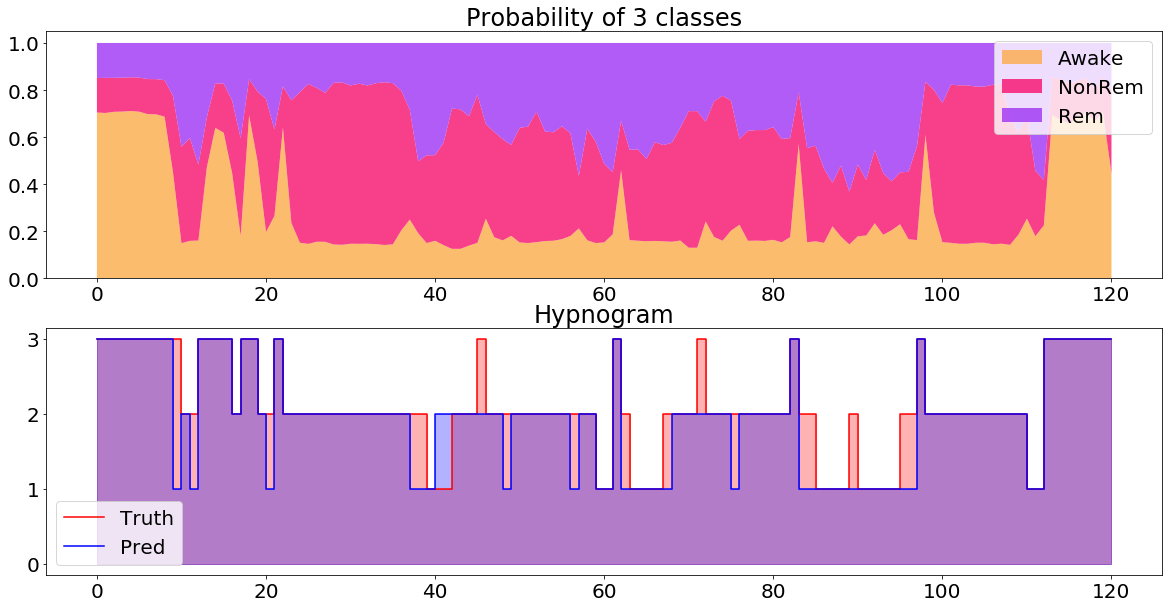

In [203]:
p_paths[1]

vdf = pd.read_csv(p_paths[0], delimiter=';')

vdf.head()

x = range(vdf.shape[0])
y1 = vdf['Awk']
y2 = vdf['NonRem']
y3 = vdf['Rem']
pred = vdf['Pred']
truth = vdf['Truth']

y = np.vstack([y1, y2, y3])

labels = ["Awake", "NonRem", "Rem"]

color_awakening = '#fcac49' # 0
color_non_rem = '#f70f6c' # 1
color_rem = '#9e33f5' # 2

fill_pal = [color_awakening, color_non_rem, color_rem]

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,10))

axs[0].set_title('Probability of 3 classes')

axs[0].stackplot(x, y, labels=labels, 
             alpha = 0.8, 
             colors = fill_pal, 
             baseline = 'zero')

axs[0].legend()

axs[1].set_title('Hypnogram')

axs[1].fill_between(x,
                 3 - truth,
                 color = 'red',
                 step = "pre", 
                 alpha = 0.3)

axs[1].step(x, 
            y = 3 - truth, 
            color = "red",
            label = "Truth")

axs[1].fill_between(x,
                 3 - pred,
                 color = 'blue',
                 step = "pre", 
                 alpha = 0.3)

axs[1].step(x,
            y = 3 - pred, 
            color = "blue",
            label = "Pred")

axs[1].legend()

plt.show()

In [83]:
vimp_df = pd.DataFrame({'Features': [c for c in temp_df.drop(X_drop,1).columns],
                       'Importance': Mild_3C_model.feature_importances_})

short_vimp = vimp_df.sort_values(['Importance'], ascending=False).iloc[range(217)]  #not null

vimp_list = short_vimp['Features']

short_vimp.tail()

,Features,Importance
94,gx_low_ema_arousal_mean,0.00074
172,ay_respi_max,0.00074
143,gz_raw_median,0.00074
185,ax_ema_arousal_max,0.00074
1078,gy_ema_arousal2_max_normalized,0.00074


In [66]:
for f in vimp_list: print(f'"{f}",')

"gx_respi_energy_low_std_med",
"gnorm_low_ema_wake3_min",
"gx_entropy_min_normalized2",
"gx_entropy_min",
"anorm_entropy_min",
"gx_entropy_min_normalized",
"gy_respi_energy2_min_normalized",
"gx_entropy_med_normalized",
"gnorm_low_ema_arousal_min",
"gx_low_ema_wake_mean_normalized",
"gnorm_respi_energy_low_std_med",
"gnorm_dc_med_normalized2",
"az_low_ema_arousal_min_normalized",
"gx_low_ema_wake4_mean",
"gnorm_ema_arousal2_med",
"gy_entropy_mean_normalized",
"gnorm_entropy_med",
"gnorm_entropy_mean",
"az_low_ema_wake_mean_normalized",
"gy_raw_max_normalized",
"gz_low_ema_arousal_min",
"gnorm_entropy_min_normalized2",
"anorm_entropy_min_normalized",
"anorm_low_ema_wake_mean_normalized2",
"gx_low_ema_wake4_min",
"ay_raw_q1_normalized",
"gy_entropy_max_normalized",
"ay_raw_mean_normalized",
"gy_entropy_min_normalized2",
"gnorm_respi_energy_low_std_med_normalized2",
"gy_ema_arousal_min_normalized",
"gy_entropy_min_normalized",
"ay_raw_max_normalized",
"gy_entropy_min",
"gx_entropy_mean_no

In [133]:
pred_score = Simp_3C_model_217.predict_proba(X_train)

In [137]:
pred_score[:,0].shape

(2022,)